In [69]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [70]:
# df = pd.read_csv('Fisheries_Production_Mexico_2005to2018.csv')
df = pd.read_csv('Fisheries_Production_Mexico_2005to2018.csv', encoding='latin-1')
df.columns.values

array(['ANO', 'LITORAL', 'ENTIDAD', 'MES', 'GRUPO',
       'NOMBRE_PRINCIPAL_ESPECIE', 'ORIGEN', 'ORIGEN DEL CAMARON',
       'TIPO_AGUA', 'DESTINO', 'ACUACULTURA', 'PESO_DESEMBARCADO_KG',
       'PESO_VIVO_KG', 'VALOR_MEXICAN_PESOS'], dtype=object)

In [71]:
# Define a dictionary mapping column names
mapping = {'ANO': 'YEAR', 'LITORAL': 'COAST','ENTIDAD':'ENTITY','MES':'MONTH','GRUPO':'GROUP','NOMBRE_PRINCIPAL_ESPECIE':'MAIN_SPECIES_NAME'
            ,'ORIGEN':'ORIGIN','ORIGEN DEL CAMARON':'ORIGIN_OF_THE_SHRIMP','TIPO_AGUA':'WATER_TYPE','DESTINO':'DESTINATION','ACUACULTURA':'AQUACULTURE'
            ,'PESO_DESEMBARCADO_KG':'LANDED_WEIGHT_KG','PESO_VIVO_KG':'LIVE_WEIGHT_KG','VALOR_MEXICAN_PESOS':'VALUE_MEXICAN_PESOS'}

# Use the rename() method to apply the mapping
df = df.rename(columns=mapping)
df.columns.values

array(['YEAR', 'COAST', 'ENTITY', 'MONTH', 'GROUP', 'MAIN_SPECIES_NAME',
       'ORIGIN', 'ORIGIN_OF_THE_SHRIMP', 'WATER_TYPE', 'DESTINATION',
       'AQUACULTURE', 'LANDED_WEIGHT_KG', 'LIVE_WEIGHT_KG',
       'VALUE_MEXICAN_PESOS'], dtype=object)

In [72]:
# Define the dictionary mapping column names for 'LITORAL'
mapping_Yanzhen_Xu = {'GOLFO Y CARIBE': 'Gulf and Caribbean', 'PACIFICO': 'PEACEFUL','SIN LITORAL':'LANDLOCKED'}
df = df.replace(mapping_Yanzhen_Xu)

# Define the dictionary mapping column names for 'ENTIDAD'
# some after translation were incorrect, so I translated again.
mapping_Yanzhen_Xu = {
    'AGUASCALIENTES': 'Aguascalientes',
    'BAJA CALIFORNIA': 'Lower California',
    'BAJA CALIFORNIA SUR': 'South Lower California',
    'CAMPECHE': 'Campeche',
    'CHIAPAS': 'Chiapas',
    'CHIHUAHUA': 'Chihuahua',
    'COAHUILA': 'Coahuila',
    'COLIMA': 'Colima',
    'DURANGO': 'Durango',
    'GUANAJUATO': 'Guanajuato',
    'GUERRERO': 'Guerrero',
    'HIDALGO': 'Hidalgo',
    'JALISCO': 'Jalisco',
    'MEXICO': 'Mexico',
    'MICHOACAN': 'Michoacan',
    'MORELOS': 'Morelos',
    'NAYARIT': 'Nayarit',
    'NUEVO LEON': 'Nuevo Leon',
    'OAXACA': 'Oaxaca',
    'PUEBLA': 'Puebla',
    'QUERETARO': 'Queretaro',
    'QUINTANA ROO': 'Quintana Roo',
    'SAN LUIS POTOSI': 'San Luis Potosi',
    'SINALOA': 'Sinaloa',
    'SONORA': 'Sonora',
    'TABASCO': 'Tabasco',
    'TAMAULIPAS': 'Tamaulipas',
    'TLAXCALA': 'Tlaxcala',
    'VERACRUZ': 'Veracruz',
    'YUCATAN': 'Yucatan',
    'ZACATECAS': 'Zacatecas'
}

df = df.replace(mapping_Yanzhen_Xu)

# Define the dictionary mapping column names for 'MES'
mapping_Yanzhen_Xu = {'ABRIL': '4', 'AGOSTO': '8', 'DICIEMBRE': '12', 'ENERO': '1', 'FEBRERO': '2', 'JULIO': '7', 'JUNIO': '6', 'MARZO': '3', 'MAYO': '5', 'NOVIEMBRE': '11', 'OCTUBRE': '10', 'SEPTIEMBRE': '9'}

# Use map method to create a new column 'MONTH_NO'
df['MONTH_NO'] = df['MONTH'].map(mapping_Yanzhen_Xu)

# Define the dictionary mapping column names for 'MES'
mapping_Yanzhen_Xu = {'ABRIL': 'APRIL', 'AGOSTO': 'AUGUST', 'DICIEMBRE': 'DECEMBER', 'ENERO': 'JANUARY', 'FEBRERO': 'FEBRUARY', 'JULIO': 'JULY', 'JUNIO': 'JUNE', 'MARZO': 'MARCH', 'MAYO': 'MAY', 'NOVIEMBRE': 'NOVEMBER', 'OCTUBRE': 'OCTOBER', 'SEPTIEMBRE': 'SEPTEMBER'}

df = df.replace(mapping_Yanzhen_Xu)

 #Define the dictionary mapping column names for 'GRUPO'
mapping_Yanzhen_Xu = {'ANIMAL': 'ANIMAL', 'VEGETAL': 'VEGETABLE'}
df = df.replace(mapping_Yanzhen_Xu)

#Define the dictionary mapping column names for 'NOMBRE_PRINCIPAL_ESPECIE'
#mapping_Yanzhen_Xu =  {'ABULON': 'ABALONE', 'ALGAS': 'ALGAE', 'ALMEJA': 'CLAM', 'ANCHOVETA': 'ANCHOVY', 'ATUN': 'TUNA', 'BAGRE': 'CATFISH', 'BANDERA': 'FLAG', 'BAQUETA': 'RAMROD', 'BARRILETE': 'KITE', 'BERRUGATA': 'Berrugata', 'BESUGO': 'SEA BREAM', 'BONITO': 'PRETTY', 'CABRILLA': 'Cabrilla', 'CALAMAR': 'SQUID', 'CAMARON': 'SHRIMP', 'CAPTURA SIN REGISTRO OFICIAL': 'Capture without official registration', 'CARACOL': 'SNAIL', 'CARPA': 'CARP', 'CAZON': 'DOGFISH', 'CHARAL': 'Charal', 'CINTILLA': 'Scintilla', 'CORVINA': 'Corvina', 'ERIZO': 'SEA URCHIN', 'ESMEDREGAL': 'Cobia', 'FAUNA DE ACOMPAÑAMIENTO': 'Accompaniment fauna', 'GUACHINANGO': 'Guachinango', 'JAIBA': 'Jaiba', 'JUREL': 'MACKEREL', 'LANGOSTA': 'LOBSTER', 'LANGOSTINO': 'SHRIMP', 'LEBRANCHA': 'Lebracha', 'LENGUADO': 'SOLE', 'LISA': 'Smooth', 'LOBINA': 'Lobin', 'MACARELA': 'Macarela', 'MERO': 'MERE', 'MOJARRA': 'Mojarra', 'OSTION': 'OYSTER', 'OTRAS': 'Others', 'PAMPANO': 'VINE SHOOT', 'PARGO': 'Pargo', 'PECES DE ORNATO': 'Ornate fish', 'PEPINO DE MAR': 'SEA CUCUMBER', 'PETO': 'OVERALLS', 'PIERNA': 'LEG', 'PULPO': 'OCTOPUS', 'RAYA Y SIMILARES': 'Raya and the like', 'ROBALO': 'BASS', 'RONCO': 'HOARSE', 'RUBIA Y VILLAJAIBA': 'Rubia and Villajaiba', 'RUBIO': 'BLOND', 'SARDINA': 'SARDINE', 'SARGAZO': 'SARGASSO', 'SIERRA': 'MOUNTAIN RANGE', 'TIBURON': 'SHARK', 'TRUCHA': 'TROUT'}
mapping_Yanzhen_Xu = {'BONITO': 'PRETTY', 'BERRUGATA': 'Berrugata', 'OSTION': 'OYSTER', 'JUREL': 'MACKEREL', 'RAYA Y SIMILARES': 'Raya and the like', 'ROBALO': 'BASS', 'GUACHINANGO': 'Guachinango', 'LANGOSTINO': 'SHRIMP', 'RONCO': 'HOARSE', 'ALMEJA': 'CLAM', 'MOJARRA': 'Mojarra', 'CORVINA': 'Corvina', 'RUBIA Y VILLAJAIBA': 'Rubia and Villajaiba', 'SIERRA': 'MOUNTAIN RANGE', 'PETO': 'OVERALLS', 'CABRILLA': 'Cabrilla', 'ALGAS': 'ALGAE', 'PARGO': 'Pargo', 'PULPO': 'OCTOPUS', 'CINTILLA': 'Cintilla', 'ERIZO': 'SEA URCHIN', 'BANDERA': 'FLAG', 'CARPA': 'CARP', 'BARRILETE': 'KITE', 'MERO': 'MERE', 'JAIBA': 'Jaiba', 'TIBURON': 'SHARK', 'LEBRANCHA': 'Lebracha', 'SARDINA': 'SARDINE', 'OTRAS': 'Others', 'CAMARON': 'SHRIMP', 'TRUCHA': 'TROUT', 'CALAMAR': 'SQUID', 'CAPTURA SIN REGISTRO OFICIAL': 'Capture without official registration', 'FAUNA DE ACOMPAÃ‘AMIENTO': 'Accompaniment fauna', 'ANCHOVETA': 'Anchovy', 'ESMEDREGAL': 'Swordfish', 'ATUN': 'TUNA', 'LANGOSTA': 'LOBSTER', 'CAZON': 'DOGFISH', 'CARACOL': 'SNAIL', 'BAQUETA': 'RAMROD', 'PAMPANO': 'VINE SHOOT', 'RUBIO': 'BLOND', 'LENGUADOLISA': 'Language', 'SARGAZO': 'SARGASSO', 'PECES DE ORNATO': 'Ornate fish', 'LOBINAMACARELA': 'Lobinamachala', 'ABULON': 'ABALONE', 'PEPINO DE MAR': 'SEA CUCUMBER', 'BAGRE': 'CATFISH', 'CHARAL': 'Charal', 'PIERNA': 'LEG', 'BESUGO': 'SEA BREAM'}
df = df.replace(mapping_Yanzhen_Xu)

#Define the dictionary mapping column names for 'ORIGIN'
mapping_Yanzhen_Xu = {'CAPTURA': 'CAPTURE', 'ACUACULTURA': 'Aquaculture'}

df = df.replace(mapping_Yanzhen_Xu)

In [73]:
###### jamak ######
# print unique values in ORIGIN_OF_THE_SHRIMP
print(df['ORIGIN_OF_THE_SHRIMP'].unique())
# print unique values in WATER_TYPE
print(df['WATER_TYPE'].unique())
# print unique values in DESTINATION
print(df['DESTINATION'].unique())
# print unique values in DESTINATION
print(df['AQUACULTURE'].unique())
# print unique values in DESTINATION
print(df['LANDED_WEIGHT_KG'].unique())
# print unique values in DESTINATION
print(df['LIVE_WEIGHT_KG'].unique())

['NO APLICA' 'CULTIVO' 'MAR ABIERTO' 'ESTEROS, LAGUNAS Y BAHIAS']
['SALOBRE / MARINA' 'DULCE']
['CONSUMO HUMANO DIRECTO' 'CONSUMO HUMANO INDIRECTO' 'USO INDUSTRIAL']
['NO APLICA' 'SISTEMAS CONTROLADOS' 'PESQUERIA ACUACULTURAL']
[   292.5      334.4     6765.52  ...  50167.     58190.    204055.656]
[   308.5       334.4      6765.52   ... 202667.5223  58190.
 204055.656 ]


In [74]:
# Define a dictionary mapping column names
mapping_jamak = {'NO APLICA': 'NOT APPLICABLE', 'CULTIVO': 'CULTIVATION','MAR ABIERTO':'OPEN SEA', 'ESTEROS, LAGUNAS Y BAHIAS':'ESTUARY, LAGOONS AND BAYS'
            ,'SALOBRE / MARINA':'BRACKY/MARINE','DULCE':'FRESHWATER'
            ,'CONSUMO HUMANO DIRECTO':'DIRECT HUMAN CONSUMPTION','CONSUMO HUMANO INDIRECTO':'INDIRECT HUMAN CONSUMPTION','USO INDUSTRIAL':'INDUSTRIAL USE'
            ,'SISTEMAS CONTROLADOS':'CONTROLLED SYSTEMS','PESQUERIA ACUACULTURAL':'AQUACULTURAL FISHERY'}

df = df.replace(mapping_jamak)

# print unique values in ORIGIN_OF_THE_SHRIMP
print(df['ORIGIN_OF_THE_SHRIMP'].unique())
# print unique values in WATER_TYPE
print(df['WATER_TYPE'].unique())
# print unique values in DESTINATION
print(df['DESTINATION'].unique())
# print unique values in DESTINATION
print(df['AQUACULTURE'].unique())

['NOT APPLICABLE' 'CULTIVATION' 'OPEN SEA' 'ESTUARY, LAGOONS AND BAYS']
['BRACKY/MARINE' 'FRESHWATER']
['DIRECT HUMAN CONSUMPTION' 'INDIRECT HUMAN CONSUMPTION' 'INDUSTRIAL USE']
['NOT APPLICABLE' 'CONTROLLED SYSTEMS' 'AQUACULTURAL FISHERY']


In [75]:
# select object columns only and apply the upper() method
df_obj = df.select_dtypes(include=['object'])
df[df_obj.columns] = df_obj.applymap(str.upper)

df.shape

(134354, 15)

In [76]:
# Save the DataFrame to a CSV file
df.to_csv('fish_mapping.csv', index=False, mode='w')
# ProfileReport(df, title="EDA Report", explorative=True)
# Save report to an HTML file
# profile.to_file("report.html")

In [77]:
#Incomplete data >> Remove missing values
# drop rows with missing values
df = df.dropna()

# Check for missing values once again
missing_values = df.isnull().sum()

# Print the results
print(missing_values)

YEAR                    0
COAST                   0
ENTITY                  0
MONTH                   0
GROUP                   0
MAIN_SPECIES_NAME       0
ORIGIN                  0
ORIGIN_OF_THE_SHRIMP    0
WATER_TYPE              0
DESTINATION             0
AQUACULTURE             0
LANDED_WEIGHT_KG        0
LIVE_WEIGHT_KG          0
VALUE_MEXICAN_PESOS     0
MONTH_NO                0
dtype: int64


In [78]:
ProfileReport(df, title="EDA Report", explorative=True)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
df.dtypes

YEAR                      int64
COAST                    object
ENTITY                   object
MONTH                    object
GROUP                    object
MAIN_SPECIES_NAME        object
ORIGIN                   object
ORIGIN_OF_THE_SHRIMP     object
WATER_TYPE               object
DESTINATION              object
AQUACULTURE              object
LANDED_WEIGHT_KG        float64
LIVE_WEIGHT_KG          float64
VALUE_MEXICAN_PESOS     float64
MONTH_NO                 object
dtype: object

In [80]:
#Adding new column('PER_KG_PESOS') and round to 2 decimal places
df['LANDED_PER_KG_PESOS'] = (df['VALUE_MEXICAN_PESOS'] / df['LANDED_WEIGHT_KG']).round(2)
#Adding new column('PER_KG_PESOS') and round to 2 decimal places
df['LIVE_PER_KG_PESOS'] = (df['VALUE_MEXICAN_PESOS'] / df['LIVE_WEIGHT_KG']).round(2)

In [81]:
# Check for missing values once again
missing_values = df.isnull().sum()

# Print the results
print(missing_values)

df.shape

YEAR                    0
COAST                   0
ENTITY                  0
MONTH                   0
GROUP                   0
MAIN_SPECIES_NAME       0
ORIGIN                  0
ORIGIN_OF_THE_SHRIMP    0
WATER_TYPE              0
DESTINATION             0
AQUACULTURE             0
LANDED_WEIGHT_KG        0
LIVE_WEIGHT_KG          0
VALUE_MEXICAN_PESOS     0
MONTH_NO                0
LANDED_PER_KG_PESOS     8
LIVE_PER_KG_PESOS       9
dtype: int64


(134354, 17)

'LIVE_WEIGHT_KG' column has 0, which would result in division by 0 and produce 'inf' values in the 'LIVE_PER_KG_PESOS' column. This can happen even if you previously dropped all missing values from the DataFrame.

In [82]:
# Replace 'inf' values with 'NaN' values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any remaining 'NaN' values
df.dropna(inplace=True)

# Check for missing values once again
missing_values = df.isnull().sum()

# Print the results
print(missing_values)

df.shape

YEAR                    0
COAST                   0
ENTITY                  0
MONTH                   0
GROUP                   0
MAIN_SPECIES_NAME       0
ORIGIN                  0
ORIGIN_OF_THE_SHRIMP    0
WATER_TYPE              0
DESTINATION             0
AQUACULTURE             0
LANDED_WEIGHT_KG        0
LIVE_WEIGHT_KG          0
VALUE_MEXICAN_PESOS     0
MONTH_NO                0
LANDED_PER_KG_PESOS     0
LIVE_PER_KG_PESOS       0
dtype: int64


(133763, 17)

In [83]:
#Adding new column to join Year+Month by ":"
# define a function to concatenate the year and month columns
def concat_ym(YEAR, MONTH_NO):
    return str(YEAR) + ':' + str(MONTH_NO)

# apply the function to create a new column
df['YEAR_MONTH'] = df.apply(lambda row: concat_ym(row['YEAR'], row['MONTH_NO']), axis=1)

df.head()


,YEAR,COAST,ENTITY,MONTH,GROUP,MAIN_SPECIES_NAME,ORIGIN,ORIGIN_OF_THE_SHRIMP,WATER_TYPE,DESTINATION,AQUACULTURE,LANDED_WEIGHT_KG,LIVE_WEIGHT_KG,VALUE_MEXICAN_PESOS,MONTH_NO,LANDED_PER_KG_PESOS,LIVE_PER_KG_PESOS,YEAR_MONTH
0,2018,GULF AND CARIBBEAN,CAMPECHE,JANUARY,ANIMAL,ANCHOVY,CAPTURE,NOT APPLICABLE,BRACKY/MARINE,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,292.50,308.50,2.654417e+03,1,9.07,8.60,2018:1
1,2018,GULF AND CARIBBEAN,CAMPECHE,JANUARY,ANIMAL,CATFISH,CAPTURE,NOT APPLICABLE,FRESHWATER,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,334.40,334.40,1.814110e+03,1,5.42,5.42,2018:1
2,2018,GULF AND CARIBBEAN,CAMPECHE,JANUARY,ANIMAL,CATFISH,CAPTURE,NOT APPLICABLE,BRACKY/MARINE,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,6765.52,6765.52,5.218646e+04,1,7.71,7.71,2018:1
3,2018,GULF AND CARIBBEAN,CAMPECHE,JANUARY,ANIMAL,FLAG,CAPTURE,NOT APPLICABLE,BRACKY/MARINE,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,152706.80,152706.80,1.390233e+06,1,9.10,9.10,2018:1
4,2018,GULF AND CARIBBEAN,CAMPECHE,JANUARY,ANIMAL,BERRUGATA,CAPTURE,NOT APPLICABLE,BRACKY/MARINE,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,23780.40,23780.40,1.402300e+05,1,5.90,5.90,2018:1


In [84]:
# 1 define a list of column names in the desired order
col_order = ['YEAR','MONTH','YEAR_MONTH','COAST','ENTITY','GROUP','MAIN_SPECIES_NAME','ORIGIN','ORIGIN_OF_THE_SHRIMP','WATER_TYPE','DESTINATION','AQUACULTURE'
            ,'LANDED_WEIGHT_KG','LIVE_WEIGHT_KG','VALUE_MEXICAN_PESOS','LANDED_PER_KG_PESOS','LIVE_PER_KG_PESOS']

# select the columns in the desired order rename as dt1
dt1= df[col_order]
dt1.head()
# df.describe()

,YEAR,MONTH,YEAR_MONTH,COAST,ENTITY,GROUP,MAIN_SPECIES_NAME,ORIGIN,ORIGIN_OF_THE_SHRIMP,WATER_TYPE,DESTINATION,AQUACULTURE,LANDED_WEIGHT_KG,LIVE_WEIGHT_KG,VALUE_MEXICAN_PESOS,LANDED_PER_KG_PESOS,LIVE_PER_KG_PESOS
0,2018,JANUARY,2018:1,GULF AND CARIBBEAN,CAMPECHE,ANIMAL,ANCHOVY,CAPTURE,NOT APPLICABLE,BRACKY/MARINE,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,292.50,308.50,2.654417e+03,9.07,8.60
1,2018,JANUARY,2018:1,GULF AND CARIBBEAN,CAMPECHE,ANIMAL,CATFISH,CAPTURE,NOT APPLICABLE,FRESHWATER,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,334.40,334.40,1.814110e+03,5.42,5.42
2,2018,JANUARY,2018:1,GULF AND CARIBBEAN,CAMPECHE,ANIMAL,CATFISH,CAPTURE,NOT APPLICABLE,BRACKY/MARINE,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,6765.52,6765.52,5.218646e+04,7.71,7.71
3,2018,JANUARY,2018:1,GULF AND CARIBBEAN,CAMPECHE,ANIMAL,FLAG,CAPTURE,NOT APPLICABLE,BRACKY/MARINE,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,152706.80,152706.80,1.390233e+06,9.10,9.10
4,2018,JANUARY,2018:1,GULF AND CARIBBEAN,CAMPECHE,ANIMAL,BERRUGATA,CAPTURE,NOT APPLICABLE,BRACKY/MARINE,DIRECT HUMAN CONSUMPTION,NOT APPLICABLE,23780.40,23780.40,1.402300e+05,5.90,5.90


In [85]:
# 2 define a list of column names in the desired order
col_order2 = ['YEAR_MONTH','MAIN_SPECIES_NAME','LANDED_PER_KG_PESOS','LIVE_PER_KG_PESOS']

# select the columns in the desired order
dt = dt1[col_order2]

dt.head()

# create a new dataframe to aggregate the SUM of the 'LANDED_WEIGHT_KG','LIVE_WEIGHT_KG' and group it by 
# define the columns to group by
group_cols = ['YEAR_MONTH', 'MAIN_SPECIES_NAME']

# calculate the sum of the desired columns
sum_cols = ['LANDED_PER_KG_PESOS','LIVE_PER_KG_PESOS']
dt = dt.groupby(group_cols)[sum_cols].sum().reset_index()

dt.head()
dt.describe()

,LANDED_PER_KG_PESOS,LIVE_PER_KG_PESOS
count,9.064000e+03,9.064000e+03
mean,7.839863e+03,7.581394e+03
std,1.549869e+05,1.513081e+05
min,5.500000e-01,2.000000e-01
25%,8.629750e+01,8.373750e+01
50%,2.124600e+02,2.007950e+02
75%,4.211350e+02,4.017225e+02
max,4.948218e+06,4.951611e+06


In Summary:
1. From my observation the dataset contains 0 missing values and duplication are mainly skewed to "NOT APPLICABLE" values.
2. Are we taking rows from the year 2005? How do we approach to for our projects? 
3. The LANDED_WEIGHT_KG column is highly skewed. Can be considered to be remove from model training. Method to handle it?
4. The LIVE_WEIGHT_KG column is highly skewed. Can be considered to be remove from model training. Method to handle it?
5. The VALUE_MEXICAN_PESOS column is highly skewed. Can be considered to be remove from model training. Method to handle it?
6. Since the Target Variables is highly skewed. It will impose a challenge for our outcome. Need to find ways to approach it.

In [86]:
#### Preprocessing 1

dt1 = dt1.copy()

#Noisy data >> Binning, clustering
# LANDED_WEIGHT_KG
# set up the bin boundaries and labels
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, dt1['LANDED_WEIGHT_KG'].max()]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '>1M']

# bin the data and create a new column with the assigned bin labels
dt1.loc[:, 'LANDED_WEIGHT_KG_BINNED'] = pd.cut(dt1['LANDED_WEIGHT_KG'], bins=bins, labels=labels)

# LANDED_WEIGHT_KG
# set up the bin boundaries and labels
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, dt1['LIVE_WEIGHT_KG'].max()]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '>1M']

# bin the data and create a new column with the assigned bin labels
dt1.loc[:,'LIVE_WEIGHT_KG_BINNED'] = pd.cut(dt1['LIVE_WEIGHT_KG'], bins=bins, labels=labels)

# Check for missing values once again
missing_values = dt1.isnull().sum()

# Print the results
print(missing_values)

#VALUE_MEXICAN_PESOS
# set up the bin boundaries and labels
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, dt1['VALUE_MEXICAN_PESOS'].max()]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '>1M']

# bin the data and create a new column with the assigned bin labels
dt1.loc[:,'VALUE_MEXICAN_PESOS_BINNED'] = pd.cut(dt1['VALUE_MEXICAN_PESOS'], bins=bins, labels=labels)

YEAR                       0
MONTH                      0
YEAR_MONTH                 0
COAST                      0
ENTITY                     0
GROUP                      0
MAIN_SPECIES_NAME          0
ORIGIN                     0
ORIGIN_OF_THE_SHRIMP       0
WATER_TYPE                 0
DESTINATION                0
AQUACULTURE                0
LANDED_WEIGHT_KG           0
LIVE_WEIGHT_KG             0
VALUE_MEXICAN_PESOS        0
LANDED_PER_KG_PESOS        0
LIVE_PER_KG_PESOS          0
LANDED_WEIGHT_KG_BINNED    0
LIVE_WEIGHT_KG_BINNED      0
dtype: int64


post1: (133012, 17)
post2: (118343, 17)
post3: (113683, 17)
post4 (113680, 17)


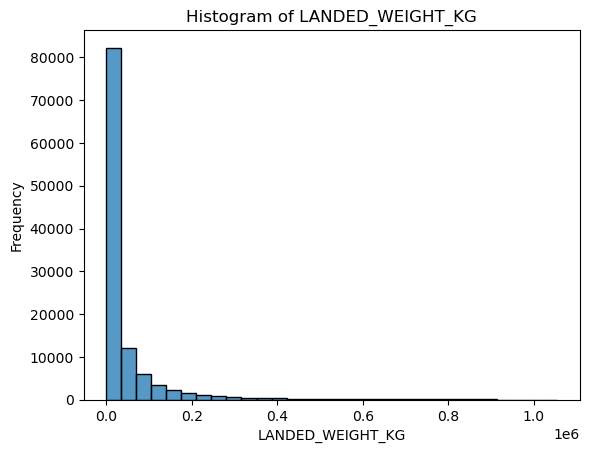

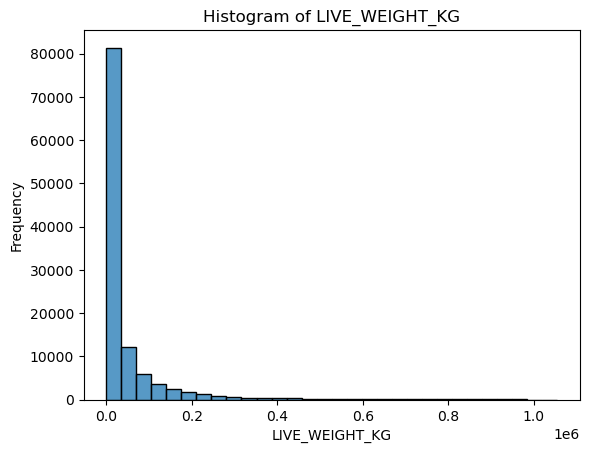

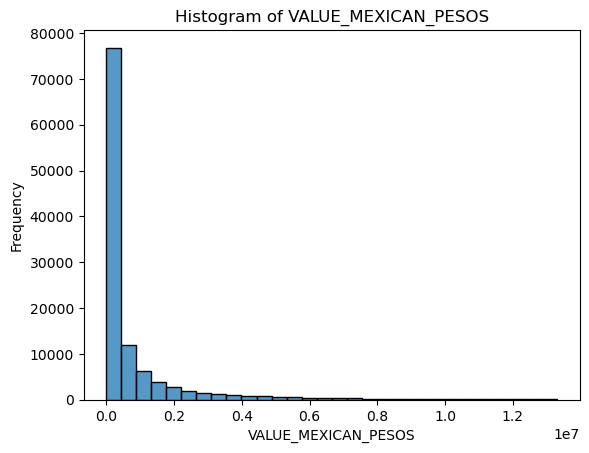

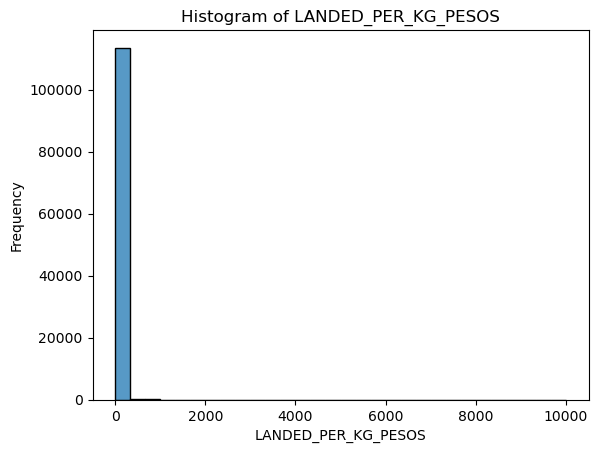

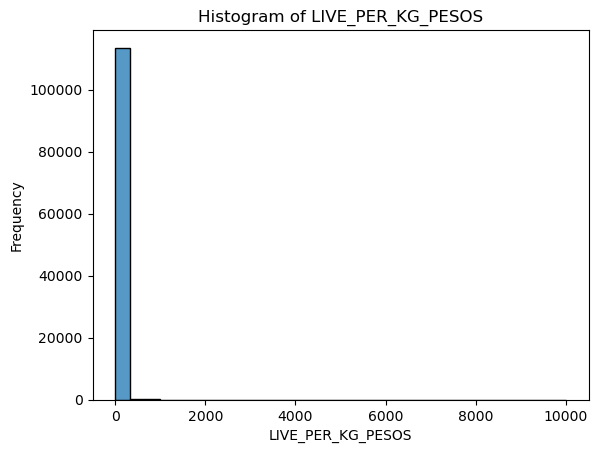

post5 (113680, 15)


,YEAR,LANDED_WEIGHT_KG,LIVE_WEIGHT_KG,LANDED_PER_KG_PESOS,LIVE_PER_KG_PESOS,VALUE_MEXICAN_PESOS
count,113680.000000,1.136800e+05,1.136800e+05,113680.000000,113680.000000,1.136800e+05
mean,2011.661488,4.674555e+04,4.924026e+04,25.817109,24.661464,8.242318e+05
std,4.064561,1.047160e+05,1.103214e+05,50.276928,48.900659,1.723549e+06
min,2005.000000,7.000000e-02,7.000000e-02,0.100000,0.080000,1.000000e+00
25%,2008.000000,1.615500e+03,1.677000e+03,9.820000,9.400000,2.750216e+04
50%,2012.000000,8.799000e+03,9.190650e+03,16.260000,15.600000,1.553580e+05
75%,2015.000000,4.122800e+04,4.339775e+04,30.480000,30.000000,7.176245e+05
max,2018.000000,1.054326e+06,1.054326e+06,10000.000000,10000.000000,1.330516e+07


In [87]:
#### Preprocessing 2
# 1 define a list of column names in the desired order
col_order = ['YEAR','MONTH','YEAR_MONTH','COAST','ENTITY','GROUP','MAIN_SPECIES_NAME','ORIGIN','ORIGIN_OF_THE_SHRIMP','WATER_TYPE','DESTINATION','AQUACULTURE'
            ,'LANDED_WEIGHT_KG','LIVE_WEIGHT_KG','VALUE_MEXICAN_PESOS','LANDED_PER_KG_PESOS','LIVE_PER_KG_PESOS']

# select the columns in the desired order
dt2= df[col_order]
dt2 = dt2.copy()

#GROUP, Drop rows that contains information regarding 'VEGETABLE' and DROP the column GROUP
dt2 = dt2[dt2['GROUP'] != 'VEGETABLE']
print('post1:',dt2.shape)

#MAIN_SPECIES_NAME, Drop rows that contains information regarding ‘CAPTURE WITHOUT OFFICIAL REGISTRATION’, ‘FAUNA DE ACOMPANAMIENTO‘ and ‘OTHERS’
values_to_drop = ['MOUNTAIN RANGE','CAPTURE WITHOUT OFFICIAL REGISTRATION', 'FAUNA DE ACOMPANAMIENTO', 'OVERALLS',  'OTHERS']
dt2 = dt2[~dt2['MAIN_SPECIES_NAME'].isin(values_to_drop)]
print('post2:',dt2.shape)

#ORIGIN_OF_THE_SHRIMP, Drop column

#Define the columns with outliers
columns_with_outliers = ['LANDED_WEIGHT_KG', 'LIVE_WEIGHT_KG', 'VALUE_MEXICAN_PESOS']

#Function to remove outliers using z-score method
def remove_outliers_zscore(dt2, column, threshold=3):
    z_scores = (dt2[column] - dt2[column].mean()) / dt2[column].std()
    dt2 = dt2.loc[abs(z_scores) < threshold]
    return dt2

#Iterate over the columns and remove outliers
for column in columns_with_outliers:
    dt2 = remove_outliers_zscore(dt2, column)

print('post3:',dt2.shape)

#Dropping rows with 0 values in 'VALUE_MEXICAN_PESOS'
dt2 = dt2[dt2['VALUE_MEXICAN_PESOS'] != 0.0]
print('post4',dt2.shape)

#Histogram Plot to see improvement in distribution
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['LANDED_WEIGHT_KG', 'LIVE_WEIGHT_KG', 'VALUE_MEXICAN_PESOS','LANDED_PER_KG_PESOS','LIVE_PER_KG_PESOS']

for column in columns:
    # Histogram of a numerical column
    sns.histplot(dt2[column], bins=30)  # Adjust the number of bins as per your preference
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# 2 define a list of column names in the desired order
col_order = ['YEAR','MONTH','YEAR_MONTH','COAST','ENTITY','MAIN_SPECIES_NAME','ORIGIN','WATER_TYPE','DESTINATION','AQUACULTURE'
            ,'LANDED_WEIGHT_KG','LIVE_WEIGHT_KG','LANDED_PER_KG_PESOS','LIVE_PER_KG_PESOS','VALUE_MEXICAN_PESOS']
# select the columns in the desired order
dt2= dt2[col_order]
print('post5',dt2.shape)
dt2.describe()

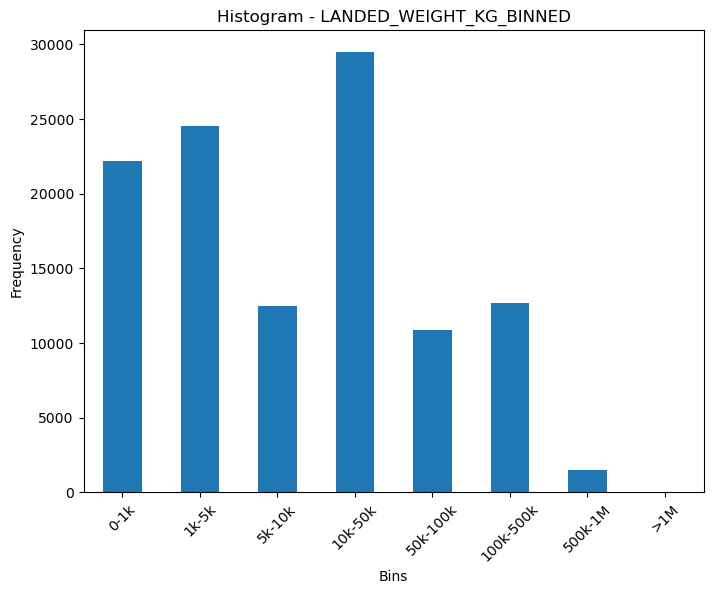

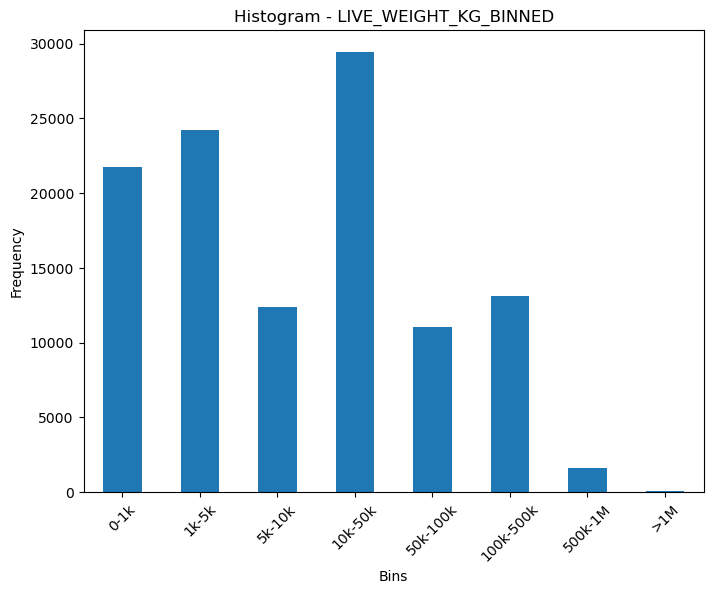

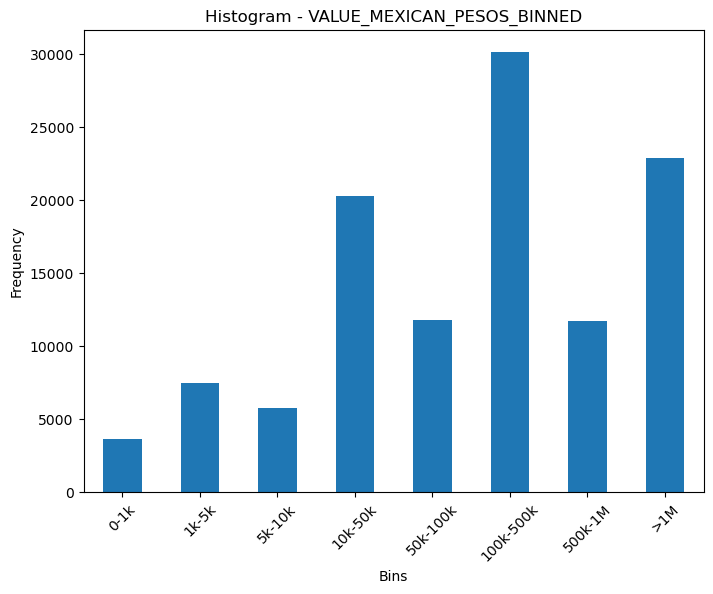

In [88]:
# LANDED_WEIGHT_KG
# set up the bin boundaries and labels
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, dt2['LANDED_WEIGHT_KG'].max()]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '>1M']

# bin the data and create a new column with the assigned bin labels
dt2.loc[:, 'LANDED_WEIGHT_KG_BINNED'] = pd.cut(dt2['LANDED_WEIGHT_KG'], bins=bins, labels=labels)

# LIVE_WEIGHT_KG
# set up the bin boundaries and labels
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, dt2['LIVE_WEIGHT_KG'].max()]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '>1M']

# bin the data and create a new column with the assigned bin labels
dt2.loc[:,'LIVE_WEIGHT_KG_BINNED'] = pd.cut(dt2['LIVE_WEIGHT_KG'], bins=bins, labels=labels)

#VALUE_MEXICAN_PESOS
# set up the bin boundaries and labels
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, dt2['VALUE_MEXICAN_PESOS'].max()]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '>1M']

# bin the data and create a new column with the assigned bin labels
dt2.loc[:,'VALUE_MEXICAN_PESOS_BINNED'] = pd.cut(dt2['VALUE_MEXICAN_PESOS'], bins=bins, labels=labels)

# Define the binned columns and their corresponding titles
binned_columns = ['LANDED_WEIGHT_KG_BINNED', 'LIVE_WEIGHT_KG_BINNED', 'VALUE_MEXICAN_PESOS_BINNED']
column_titles = ['Histogram - LANDED_WEIGHT_KG_BINNED', 'Histogram - LIVE_WEIGHT_KG_BINNED', 'Histogram - VALUE_MEXICAN_PESOS_BINNED']

# Plot histograms for each binned column
for column, title in zip(binned_columns, column_titles):
    plt.figure(figsize=(8, 6))
    dt2[column].value_counts().sort_index().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [89]:
# 2 define a list of column names in the desired order
col_order = ['YEAR','MONTH','YEAR_MONTH','COAST','ENTITY','MAIN_SPECIES_NAME','ORIGIN','WATER_TYPE','DESTINATION','AQUACULTURE'
            ,'LANDED_WEIGHT_KG_BINNED','LIVE_WEIGHT_KG_BINNED','LANDED_PER_KG_PESOS','LIVE_PER_KG_PESOS','VALUE_MEXICAN_PESOS']
# select the columns in the desired order
dt2= dt2[col_order]
print('post6',dt2.shape)
dt2.describe()

post6 (113680, 15)


,YEAR,LANDED_PER_KG_PESOS,LIVE_PER_KG_PESOS,VALUE_MEXICAN_PESOS
count,113680.000000,113680.000000,113680.000000,1.136800e+05
mean,2011.661488,25.817109,24.661464,8.242318e+05
std,4.064561,50.276928,48.900659,1.723549e+06
min,2005.000000,0.100000,0.080000,1.000000e+00
25%,2008.000000,9.820000,9.400000,2.750216e+04
50%,2012.000000,16.260000,15.600000,1.553580e+05
75%,2015.000000,30.480000,30.000000,7.176245e+05
max,2018.000000,10000.000000,10000.000000,1.330516e+07


In [90]:
# Check for missing values once again
missing_values = dt2.isnull().sum()

# Print the results
print(missing_values)

dt2.shape

YEAR                       0
MONTH                      0
YEAR_MONTH                 0
COAST                      0
ENTITY                     0
MAIN_SPECIES_NAME          0
ORIGIN                     0
WATER_TYPE                 0
DESTINATION                0
AQUACULTURE                0
LANDED_WEIGHT_KG_BINNED    0
LIVE_WEIGHT_KG_BINNED      0
LANDED_PER_KG_PESOS        0
LIVE_PER_KG_PESOS          0
VALUE_MEXICAN_PESOS        0
dtype: int64


(113680, 15)

In [91]:
#Transformation
#Adding new column('PER_KG_PESOS') and round to 2 decimal places
dt1.loc[:,'LANDED_PER_KG_PESOS'] = (dt1['VALUE_MEXICAN_PESOS'] / dt1['LANDED_WEIGHT_KG']).round(2)
#Adding new column('PER_KG_PESOS') and round to 2 decimal places
dt1.loc[:,'LIVE_PER_KG_PESOS'] = (dt1['VALUE_MEXICAN_PESOS'] / dt1['LIVE_WEIGHT_KG']).round(2)

df.describe()

,YEAR,LANDED_WEIGHT_KG,LIVE_WEIGHT_KG,VALUE_MEXICAN_PESOS,LANDED_PER_KG_PESOS,LIVE_PER_KG_PESOS
count,133763.000000,1.337630e+05,1.337630e+05,1.337630e+05,1.337630e+05,1.337630e+05
mean,2011.620657,1.662325e+05,1.818714e+05,2.438159e+06,5.312420e+02,5.137277e+02
std,4.056354,1.294630e+06,1.466442e+06,2.190402e+07,3.247599e+04,3.185348e+04
min,2005.000000,7.000000e-02,7.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.000000,1.842000e+03,1.914850e+03,3.200000e+04,9.820000e+00,9.400000e+00
50%,2012.000000,1.095646e+04,1.140200e+04,1.912700e+05,1.601000e+01,1.546000e+01
75%,2015.000000,5.502790e+04,5.803990e+04,9.424011e+05,3.000000e+01,2.972000e+01
max,2018.000000,8.045294e+07,9.332541e+07,2.020440e+09,4.943030e+06,4.943030e+06


In [92]:
# Replace 'inf' values with 'NaN' values
dt1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any remaining 'NaN' values
dt1.dropna(inplace=True)

# Check for missing values once again
missing_values = dt1.isnull().sum()

# Print the results
print(missing_values)

dt1.shape

YEAR                          0
MONTH                         0
YEAR_MONTH                    0
COAST                         0
ENTITY                        0
GROUP                         0
MAIN_SPECIES_NAME             0
ORIGIN                        0
ORIGIN_OF_THE_SHRIMP          0
WATER_TYPE                    0
DESTINATION                   0
AQUACULTURE                   0
LANDED_WEIGHT_KG              0
LIVE_WEIGHT_KG                0
VALUE_MEXICAN_PESOS           0
LANDED_PER_KG_PESOS           0
LIVE_PER_KG_PESOS             0
LANDED_WEIGHT_KG_BINNED       0
LIVE_WEIGHT_KG_BINNED         0
VALUE_MEXICAN_PESOS_BINNED    0
dtype: int64


(133760, 20)

In [93]:
col_order3 = ['YEAR','MONTH','YEAR_MONTH','COAST','ENTITY','GROUP','MAIN_SPECIES_NAME','ORIGIN','ORIGIN_OF_THE_SHRIMP','WATER_TYPE','DESTINATION','AQUACULTURE'
            ,'LANDED_WEIGHT_KG_BINNED','LIVE_WEIGHT_KG_BINNED','VALUE_MEXICAN_PESOS_BINNED','LANDED_PER_KG_PESOS','LIVE_PER_KG_PESOS','VALUE_MEXICAN_PESOS']

# select the columns in the desired order
dt1 = dt1[col_order3].reset_index(drop=True)

# ProfileReport(df, title="EDA Report", explorative=True)

In [94]:
# Save the DataFrame to a CSV file
dt1.to_csv('fish_postprocess.csv', index=False, mode='w')


dt2.to_csv('fish_postprocess_latest.csv', index=False, mode='w')
dt2.shape

(113680, 15)